In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt   
import scipy.stats as st
import seaborn as sns

In [20]:
#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list
pima_df = pd.read_csv("pima-indians-diabetes.csv", index_col=[0])

In [35]:
pima_df.shape

(768, 8)

# Descriptive Statistics

In [23]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Pairplot using sns

/home/imperio/.virtualenvs/iipython/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/imperio/.virtualenvs/iipython/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


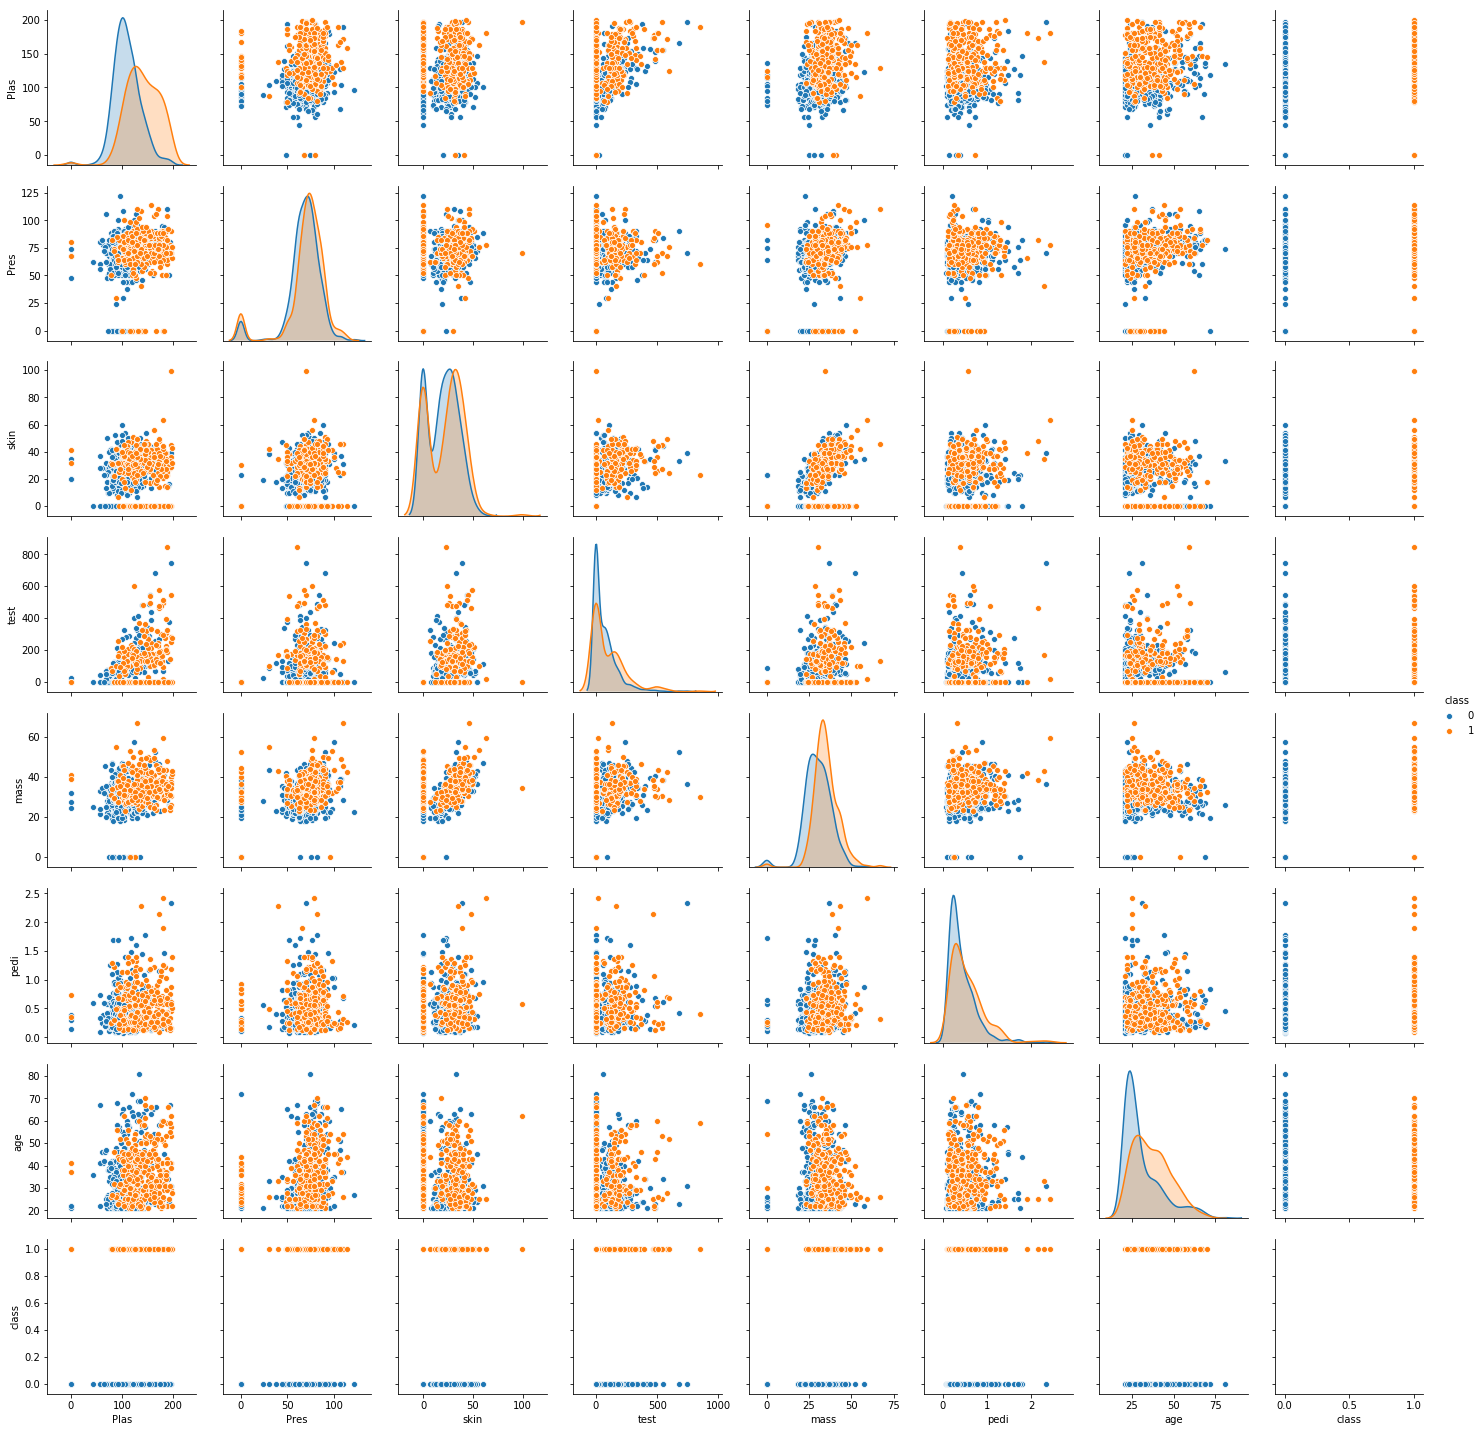

In [25]:
sns.pairplot(pima_df , hue='class' , diag_kind = 'kde')

# Inferential Statistics

 #### Statistical tests

 - Normal deviate Z test
 - Student's T Test
 - One Sample T Test
 - Two Sample T Test
 - Chi square test
 - ANOVA


 #### Application of statistics in data science and modelling

 1. Compare the given dataset characteristics (central values and spread) with production data characterisitics. Are they same?
 2. After fixing the missing values / outliers, does the data still represent the process it is supposed to
 3. For classifications problems, when we use imblearn package to address class imbalances, are the data distributions same?
 4. When we split data for training, validation and testing, do the three datasets have similar characterisitcs?
 5. When the models are built using multiple algorithms, are the differences in distribution their scores significant?


##### We use PIMA dataset below to explore application of statistical tests at each stage

##### Note:  The statistical tests are done on individual attributes. The test should be done on at least those which we modify during EDA

# Formulate the Null and Alternate Hypothesis

H0 - The difference in mean between sample BP column and population mean for BP is a statistical fluctuation. The given data represents the population distribution on the BP column

H1 - The difference in mean between sample BP column and population mean is significant. The difference is too high to be result of statistical fluctuation

if statistical tests result in rejecting H0, then building a model on the given sample data and expecting it to generalize may be a mistake

# Normal Deviate Z Test  (# has the given sample come from the production)

Used to compare mean of single sample with that of the population / production
 - Requisites 
   - Number of samples >= 30
   - the mean and standard deviation of population should be known

 - Application of NDZT  on blood pressure column 
    - Population Avg and Standard Deviation for  diastolic blood pressure = 71.3 with standard deviation of 7.2 
    
 Required population parameters and sample statistic

In [32]:
Mu = 71.3   # source - http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_BiostatisticsBasics/BS704_BiostatisticsBasics3.html
Std = 7.2

sample_avg_bp = np.average(pima_df['Pres'])
std_error_bp = Std / np.sqrt(pima_df.shape[0]) # Standard dev of the sampling mean distribution... estimated from population
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)

Sample Avg BP :  69.10546875
Standard Error:  0.2598076211353316


### Z_norm_deviate =  sample_mean - population_mean / std_error_bp

In [33]:
Z_norm_deviate = (sample_avg_bp - Mu) / std_error_bp
print("Normal Deviate Z value :" , Z_norm_deviate)

p_value = scipy.stats.norm.sf(abs(Z_norm_deviate))*2 #twosided using sf - Survival Function
print('p values' , p_value)

if p_value > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

Normal Deviate Z value : -8.446754719550293
p values 2.9951208249463475e-17
Samples are likely drawn from different distributions (reject H0)


Z score magnitude is much higher than 1.96 cutoff in normal distribution for 95% CL
This indicates that the H0 has to be rejected. Which means this BP sample data is not from the population whose mean is 71.3 and 
std = 7.2




# One Sample T-Test

In [38]:
# used when the two requirements of normal deviate Z test cannot be met i.e. when the population mean and standard deviation
# is unknown

Mu = 71.3   # source - http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_BiostatisticsBasics/BS704_BiostatisticsBasics3.html
# Std = ?  Population standard deviatin is unknown

x = pima_df['Pres']  # Storing values in a list to avoid long names
est_pop_std = np.sqrt(np.sum(abs(x - x.mean())**2) / (pima_df.shape[0] - 1))     #  sqrt(sum(xi - Xbar)^2 / (n -1))

sample_avg_bp =(pima_df['Pres']).mean()

std_error_bp = est_pop_std / np.sqrt(pima_df.shape[0]) # Standard dev of the sampling mean distribution... estimated from population

T_Statistic = (( sample_avg_bp - Mu) / std_error_bp)

pvalue = st.t.sf(np.abs(T_Statistic), pima_df.size-1)*2
print("Estimated Pop Stand Dev" , est_pop_std)
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)
print("T Statistic" , T_Statistic)
print("Pval" , pvalue)

if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

Estimated Pop Stand Dev 19.355807170644777
Sample Avg BP :  69.10546875
Standard Error:  0.6984425300221407
T Statistic -3.1420355371692934
Pval 0.0016857540204989337
Samples are likely drawn from different distributions (reject H0)


- T-Statistic magnitude is very large compared to Z  score of 1.96.
- P value is almost 0, much less than 0.05 
- Reject H0 at 95% confidence

That means the given data column of BP has is not from the population BP distribution whose mean is 71.3 and est std dev 6.44

# Two Sample T-Test

Tests whether the means of two independent samples are significantly different.

Pima Indians Dataset has many missing values in multiple columns. Let us replace the missing values with median. 
Does this step of handling missing values modify the distribution so much that statistically it is no more equivalent of original data?

In [42]:
pima_df_mod = pima_df.copy()


pima_df_mod['Pres'] = pima_df_mod['Pres'].mask(pima_df['Pres'] == 0,pima_df['Pres'].median())

In [44]:
print('   Modified Pima')
print(pima_df_mod['Pres'].describe())
print()

print('  Original Pima')
print(pima_df['Pres'].describe())

   Modified Pima
count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: Pres, dtype: float64

  Original Pima
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: Pres, dtype: float64


In [45]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(pima_df_mod['Pres'] , pima_df['Pres'])
print("compare means", pima_df_mod['Pres'].mean() , pima_df['Pres'].mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

compare means 72.38671875 69.10546875
Tstatistic , Pvalue 3.983924203237573 7.096423589275457e-05
Samples are likely drawn from different distributions (reject H0)


 P value is much less than 0.05  
 Tstatistic of 3.98 is in extreme tail region of the distribution 

Let us compare the modified bp column with the population.... Is it a good representation? If we are unable to reject H0, we
can use the modified bp column for our model than the original which had a low P value in the first norm deviate z test

In [48]:
Mu = 71.3   # source - http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_BiostatisticsBasics/BS704_BiostatisticsBasics3.html
Std = 7.2

sample_avg_bp = np.average(pima_df_mod['Pres'])
std_error_bp = Std / np.sqrt(pima_df_mod.shape[0]) # Standard dev of the sampling mean distribution... estimated from population
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)


Z_norm_deviate = (sample_avg_bp - Mu) / std_error_bp
print("Normal Deviate Z value :" , Z_norm_deviate)

Sample Avg BP :  72.38671875
Standard Error:  0.2598076211353316
Normal Deviate Z value : 4.182782418972768


In [49]:
p_value = scipy.stats.norm.sf(abs(Z_norm_deviate))*2 #twosided using sf - Survival Function
print('p values' , p_value)

if p_value > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

p values 2.8796295897772976e-05
Samples are likely drawn from different distributions (reject H0)


The bp column is not from the given population even after fixing the missing values!